In [2]:
import pandas as pd

In [3]:
TSLA = pd.read_csv('TSLA.csv')
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


The dataset described Tesla's stock price for the past 12 years. It can be downloaded from https://finance.yahoo.com/quote/TSLA/history?period1=1489017600&period2=1646784000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true, set the time frame to 12Y and download the CSV. 
Two interested questions for this dataset:
1. How Tesla's stock price changed over the past 12 years (Adj close)
2. What is the trend on the trading volume for Tesla's stock

In [4]:
#Describe the data
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2.944000e+03
mean,135.711730,138.682414,132.500325,135.725117,135.725117,3.133403e+07
std,246.107233,251.705027,239.865457,246.003069,246.003069,2.803626e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.345001,19.824500,18.968999,19.456499,19.456499,1.306600e+07
50%,46.535000,47.255001,45.705000,46.466000,46.466000,2.490740e+07
75%,67.834503,68.965498,66.666500,67.740000,67.740000,3.976950e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [15]:
TSLA.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
TSLA.index.array

<PandasArray>
[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
 ...
 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943]
Length: 2944, dtype: int64

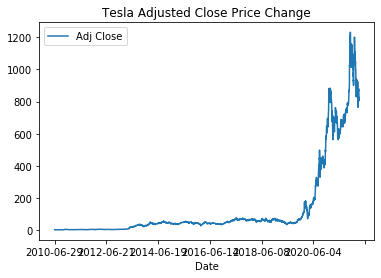

In [17]:
TSLA.plot(x='Date', y = 'Adj Close', title = 'Tesla Adjusted Close Price Change', )

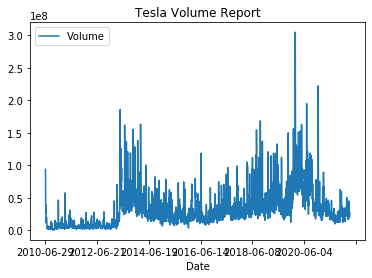

In [18]:
TSLA.plot(x = 'Date', y = 'Volume', title = 'Tesla Volume Report')

In [19]:
TSLA['Year'] = pd.DatetimeIndex(TSLA['Date']).year

In [20]:
group = TSLA.groupby('Year')
group.mean()

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2010,4.681600,4.815446,4.529215,4.668369,4.668369,7.898812e+06
2011,5.364397,5.476048,5.238833,5.360952,5.360952,6.453077e+06
2012,6.240624,6.361832,6.109176,6.233720,6.233720,6.148980e+06
2013,20.883286,21.370603,20.355976,20.880246,20.880246,4.203861e+07
2014,44.683079,45.489976,43.841222,44.665817,44.665817,3.456987e+07
2015,45.966389,46.676333,45.254127,46.008580,46.008580,2.159162e+07
2016,42.011690,42.686699,41.257230,41.953452,41.953452,2.306273e+07
2017,62.859243,63.690119,61.937394,62.863259,62.863259,3.167393e+07
2018,63.436693,64.738725,62.110462,63.461984,63.461984,4.306053e+07


In [21]:
#Create pivor table where Index set as date, cloumns set as year, value set as Volume
pivot = TSLA.pivot(index = 'Date', columns ='Year', values = 'Volume')
print(pivot)

Year              2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
Date                                                                           
2010-06-29  93831500.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-06-30  85935500.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-07-01  41094000.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-07-02  25699000.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-07-06  34334500.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2022-03-02         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2022-03-03         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2022-03-04         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2022-03-07         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2022-03-08         NaN   NaN   NaN   NaN

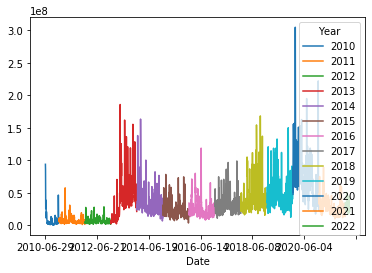

In [22]:
pivot.plot()

Discussion
From the plots of Adj close, there is an increasing trend for Tesla's stock price for the past 12 years. 
From the pivot table and plots for the volumes, 2020 has a very high volume of trading, and 2012 has relatively low trading volumes. 